In [16]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import gensim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split# for shufflr = false
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [2]:
#read the dataset
conn=sqlite3.connect('final.sqlite')
final=pd.read_sql_query("select * from Reviews ",conn)
conn.close()
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,cleaned_text_nonstem
0,93425,101582,B001BM368E,A2VFEY7LF1P0XC,claire,0,0,1,1328659200,Love this starter kit,We started our little guy on solid food with E...,start littl guy solid food earth best veggi lo...,started little guy solid food earths best vegg...
1,486287,525851,B0000BYDG9,A1T203AFVJI6UD,"Dee Flanagan ""beanie nut""",0,0,0,1261526400,"Less than useless, sorry I wasted my money!",I do not reccommend this product...Moths flew ...,not reccommend product moth flew right kept go...,not reccommend product moths flew right kept g...
2,403154,435932,B005YBGZG8,A3OKJGVP7U00A,Tman,0,0,1,1340064000,Pistachio addict...,"Hello, my name is Tom, and I'm a pistachio add...",hello name tom pistachio addict cant help exce...,hello name tom pistachio addict cant help exce...
3,270954,293709,B0007SNZP2,A1G6A8RNJYJ8BE,"WitzerAZ ""WitzerAZ""",0,0,1,1327708800,Karo Pancake Syrup-It's a southern thang!,I had received damaged bottles and had written...,receiv damag bottl written review complain top...,received damaged bottles written review compla...
4,345955,374254,B004HZI3GW,AQKQH3I5WLPFQ,H.T.S.,0,0,0,1347580800,gelatin is not an all natural ingredient,gelatin is not an all natural ingredient. for ...,gelatin not natur ingredi wish product like st...,gelatin not natural ingredient wish products l...


In [4]:
#initializing the tfidf vectorizer
tfidf_vec=TfidfVectorizer()
tfidf=tfidf_vec.fit_transform(final['cleaned_text'].values)
tfidf.shape

(364171, 71691)

In [6]:
#sampling the dataset
x=tfidf[:3000,:].toarray()
df=pd.DataFrame(x) #making dataframe of 3000 rows
type(df)

pandas.core.frame.DataFrame

In [8]:
df['time']=final['Time'].iloc[:3000]
df['score']=final['Score'].iloc[:3000]
df=df.sort_values(['time']) #sorting on time feature 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,71683,71684,71685,71686,71687,71688,71689,71690,time,score
1492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1067990400,1
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1081728000,1
1283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1098230400,0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1102982400,1
1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1109462400,1


In [12]:
x=df.iloc[:,:71691].values #ignoring last 2 features
print(type(x))
y=df['score'].values
type(y)

<class 'numpy.ndarray'>


numpy.ndarray

In [13]:
s=StandardScaler()
x=s.fit_transform(x)
x[:5,:]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [17]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,shuffle =False) #shuffle =false since it is a time series data

**KNN** K-fold 

the optimal value of k is 5


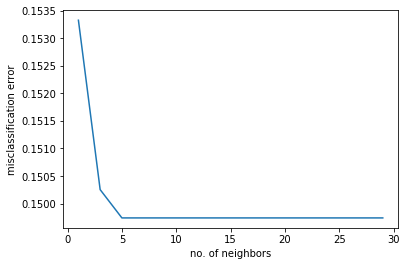

In [18]:
#code to find optimal value of K
neighbors=list(range(1,31,2))
cv_scores=[]

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy') #Hyper parameter-CV
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_k=neighbors[MSE.index(min(MSE))]
print('the optimal value of k is %d' % optimal_k)
plt.plot(neighbors,MSE)
plt.xlabel('no. of neighbors')
plt.ylabel('misclassification error')
plt.show()

In [20]:
#fitting the model on optimal value of k
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
#generating prediction
y_pred = classifier.predict(x_test)

In [23]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

81.80952380952381